# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Systems of nonlinear equations

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

A considerably more difficult problem than solving the single equation

$$f(x) = 0$$

for the root $s$ of the single variable $x$, is solving the system size
$n$:

$${\boldsymbol{f}}({\boldsymbol{x}}) = {\boldsymbol{0}}.$$

In general case may not be possible to check existence of root, let
alone uniqueness.

Where possible we shall extend the previous results.

## Simple example

Consider the system

$$\begin{aligned}
        x_1^2 + x_2^2 - 1 & = 0 \\
        5 x_1^2 + 21 x_2^2 - 9 & = 0.
      \end{aligned}$$

Have ${\bf x} = (x_1, x_2)^T$, ${\bf f} = (f_1,
      f_2)^T$

$$\begin{aligned}
        f_1(x_1, x_2) & = x_1^2 + x_2^2 - 1, \\
        f_2(x_1, x_2) & = 5 x_1^2 + 21 x_2^2 - 9.
      \end{aligned}$$

*Four* solutions ${\bf \xi} = (\pm \sqrt{3} /
      2, \pm 1 / 2)^T$. Match the four intersections of the two curves.

Functional iteration
${\boldsymbol{g}}(\boldsymbol{x}) = {\boldsymbol{f}}(\boldsymbol{x}) - \boldsymbol{x}$ fails!

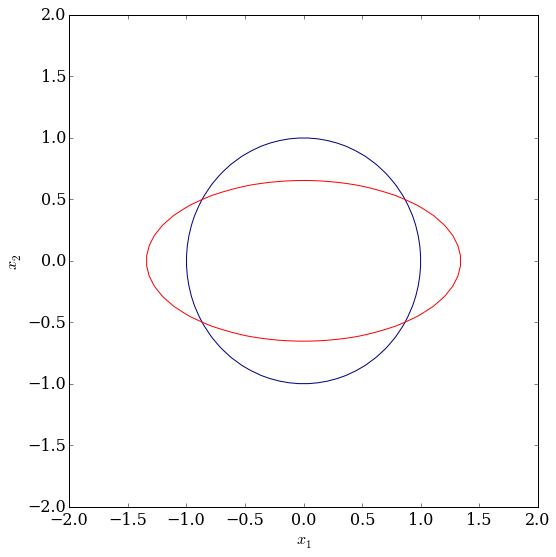

In [3]:
x1 = np.linspace(-2.0, 2.0)
x2 = np.linspace(-2.0, 2.0)
X1, X2 = np.meshgrid(x1,x2)
F1 = X1**2 + X2**2 - 1.0
F2 = 5.0*X1**2 + 21.0*X2**2 - 9.0

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.contour(X1,X2,F1,[0])
ax.contour(X1,X2,F2,[0],colors='r')
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
fig.tight_layout()
plt.show()

## Contraction mapping

Again find root ${\boldsymbol{s}}$ by constructing sequence
$\{ {\boldsymbol{x}}_n \}$ using map
${\mathbf g}: {\mathbb R}^n \rightarrow {\mathbb R}^n$:

$${\boldsymbol{x}}_{n+1} = {\boldsymbol{g}} ({\boldsymbol{x}}_n)$$

In analogy with scalar case define interval $I$ as

$$I = \{ {\boldsymbol{x}} \in {\mathbb R}^n \,\, | \, a_j < x_j < b_j, \,\, j
    = 1, 2, \dots, n \}.$$

Hence define contraction map as a Lipschitz continuous map
${\boldsymbol{g}}({\boldsymbol{x}})$ such that
${\boldsymbol{g}}(I) \subseteq I$ and with Lipschitz constant $L < 1$:

$$\| {\boldsymbol{g}}({\boldsymbol{x}}) - {\boldsymbol{g}}({\boldsymbol{y}}) \| \leq L \| {\boldsymbol{x}} -
    {\boldsymbol{y}} \| \quad \forall {\boldsymbol{x}}, {\boldsymbol{y}} \in I.$$

### Contraction mapping theorems

**Theorem**: If ${\boldsymbol{g}}$ is continuous in $I$ and ${\boldsymbol{g}}(I)
  \subseteq I$ then ${\boldsymbol{g}}$ has at least one fixed point in
$I$.

**Contraction mapping theorem in $\mathbf{R}^n$**: If ${\boldsymbol{g}}({\boldsymbol{x}})$ is a contraction mapping in
$I$ then there exists one and only one fixed point in $I$.

**Theorem**: If ${\boldsymbol{g}}({\boldsymbol{x}})$ is a contraction mapping in
$I$ then for arbitrary ${\boldsymbol{x}}_0 \in I$ then the sequence
$\{ {\boldsymbol{x}}_n
  \}$ converges to the unique fixed point with error

$$\| {\boldsymbol{e}}_n \|_{\infty} \leq \frac{L^n}{1 - L} \| {\boldsymbol{x}}_1 -
    {\boldsymbol{x}}_0 \|_{\infty}.$$

**Theorem**: If ${\boldsymbol{g}}({\boldsymbol{x}})$ is a differentiable
contraction map in $I$, i.e.

$$\left| \frac{\partial g_i}{\partial x_j} \right| \leq \frac{L}{n},$$

then there exists one and only one fixed point in $I$.

### Example

Look at map

$${\boldsymbol{g}}({\boldsymbol{x}}) = \left\{
      \begin{aligned}
        g_1 (x_1, x_2, x_3) & = \tfrac{1}{3} \cos( x_2 x_3 ) +
        \tfrac{1}{6} \\
        g_2 (x_1, x_2, x_3) & = \tfrac{1}{9} \sqrt{x_1^2 + \sin{x_3} +
        1.06} - 0.1 \\
        g_3 (x_1, x_2, x_3) & = -\tfrac{1}{20} \exp(-x_1 x_2) - (10
        \pi - 3) / 60
      \end{aligned}
    \right. .$$

By computing the Jacobian of the map

$$J({\boldsymbol{x}}) =
    \begin{pmatrix}
      0 & -\tfrac{1}{3} \sin(x_2 x_3) x_3 &  -\tfrac{1}{3} \sin(x_2
      x_3) x_2 \\
      \tfrac{1}{9} \frac{x_1}{\sqrt{x_1^2 + \sin(x_3) + 1.06}} & 0 &
      \tfrac{1}{18} \frac{\cos(x_3)}{\sqrt{x_1^2 + \sin(x_3) + 1.06}}
      \\
      \tfrac{1}{20} x_2 \exp(-x_1 x_2) & \tfrac{1}{20} x_1 \exp(-x_1
      x_2) & 0
    \end{pmatrix}$$

see that all elements of $J$ are less than $1/3$ in magnitude in
$I = [-1,1]^3$. Hence there is a unique fixed point in $I$.

Iterate starting from ${\boldsymbol{x}} = (0.2, 0.3, 0.4)$: appears to
converge to a fixed point

|  $n$ |    $x_1$   |   $x_2$   |   $x_3$   |
|:----:|:----------:|:---------:|:---------:|
|    0 |     0.2    |     0.3   |    0.4    |
|    1 |  0.4976029 |  0.0356019| -0.5206870|
|    2 |  0.4999427 |  0.0000082| -0.5227208|
|    3 |  0.5000000 |  0.0000434| -0.5235986|
|    4 |  0.5000000 |  0.0000000| -0.5235977|
|    5 |  0.5000000 |  0.0000001| -0.5235988|

Convergence is linear, as usual. Geometric picture not straightforward.

In [4]:
def fn_iteration(g, x0, n_iterations = 20):
    """Functional iteration for a system given the map."""
    iters = np.zeros((n_iterations+1, len(x0)))
    iters[0, :] = x0
    for n in range(n_iterations):
        iters[n+1, :] = g(iters[n, :])
        
    return iters

In [5]:
def g1(x):
    g = np.zeros_like(x)
    g[0] = 1.0/6.0 + np.cos(x[1]*x[2])/3.0
    g[1] = 1.0/9.0*np.sqrt(x[0]**2 + np.sin(x[2]) + 1.06) - 0.1
    g[2] = -np.exp(-x[0]*x[1])/20.0 - (10.0 * np.pi - 3.0) / 60.0
    return g

In [6]:
x0 = np.array([0.2, 0.3, 0.4])
result = fn_iteration(g1, x0)

for i in range(6):
    print("Result after {} iterations is {}".format(i, result[i, :]))

Result after 0 iterations is [ 0.2  0.3  0.4]
Result after 1 iterations is [ 0.49760288  0.03560192 -0.520687  ]
Result after 2 iterations is [  4.99942729e-01   8.17315463e-06  -5.22720795e-01]
Result after 3 iterations is [  5.00000000e-01   4.34028313e-05  -5.23598571e-01]
Result after 4 iterations is [  5.00000000e-01   1.09216245e-08  -5.23597691e-01]
Result after 5 iterations is [  5.00000000e-01   5.80001612e-08  -5.23598775e-01]


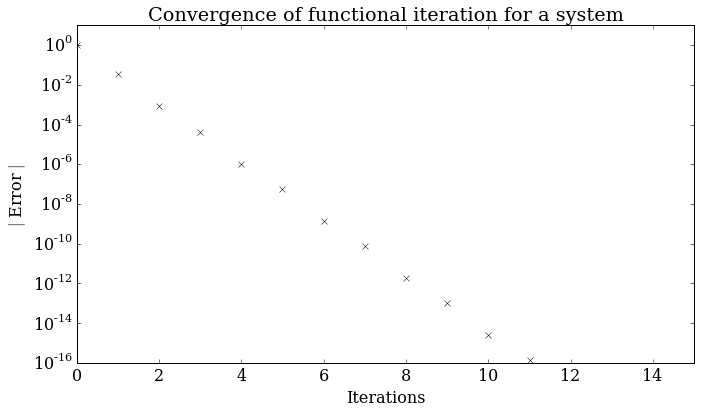

In [7]:
iters = range(len(result))
errors = np.linalg.norm(result-result[-1,:],2,axis=1)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(iters, errors, 'kx')
ax.set_xlabel("Iterations")
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_xbound(0.0,15.0)
ax.set_title("Convergence of functional iteration for a system")
fig.tight_layout()
plt.show()

### Geometric picture

Trying to find unique point giving the intersection of *each* map with
the appropriate axis plane; we move along each in turn.

### (Non)linear systems analogies

Consider e.g. Jacobi for $A {\boldsymbol{x}} = {\boldsymbol{b}}$:
constructs sequence $\{ {\boldsymbol{x}}_n\}$ with correct answer in the
limit. Analogous to iterative methods here. Inspires:

1.  “Gauss-Seidel”: use guess as soon as possible. I.e.,

    $$\begin{aligned}
          &&(x_1)_{n+1} & = g_1\left((x_1)_n, (x_2)_n\right) \\
          \text{then }&& (x_2)_{n+1} &= g_2\left((x_1)_{n+1}, (x_2)_n\right).
        \end{aligned}$$

2.  “Relaxation”:
    $\hat{{\boldsymbol{x}}}_{n+1} = {\boldsymbol{g}}({\boldsymbol{x}}_n)$,
    but *actual* next iterate uses “correction” as

    $${\boldsymbol{x}}_{n+1} = \boldsymbol{x}_n + \omega (\hat{\boldsymbol{x}}_{n+1} - \boldsymbol{x}_n).$$

    Typically take $\omega < 1$ to promote convergence (*under*
    relaxation); can be impractical (slow).

## Newton’s method in two dimensions

### Newton’s method – graphical approach

“Best” method in scalar case: Newton iteration.

Scalar geometric picture: follow tangent from curve to axis.

Derive using Taylor expansion:

$$\begin{aligned}
        z &= f(x_n) + (x - x_n) f'(x_n) \\
        z & = 0 \quad \implies \quad x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
      \end{aligned}$$

System geometric picture: follow tangent *planes*. Apply to each
component (map). Find mutual intersections.

### Newton’s method from Taylor series

The planes tangent to the surface are given by the Taylor expansion

$$\begin{aligned}
    z_1 = & f_1 (x_n,y_n) + (x - x_n) \frac{\partial
      f_1}{\partial x}+ (y - y_n) \frac{\partial
      f_1}{\partial y}, \\
    z_2 = &f_2 (x_n,y_n) + (x - x_n) \frac{\partial
      f_2}{\partial x}+ (y - y_n) \frac{\partial
      f_2}{\partial y}.
  \end{aligned}$$

Set $z_1=0$, $z_2=0$ to find next iterate.

$$\begin{aligned}
    \begin{pmatrix}
      \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\ \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
    \end{pmatrix}
    \begin{pmatrix}
      x_{n+1} - x_{n} \\ y_{n+1} - y_{n}
    \end{pmatrix}
    =
    \begin{pmatrix}
      -f_1 (x_n,y_n) \\ -f_2 (x_n,y_n)
    \end{pmatrix}.
  \end{aligned}$$

This can be written as a matrix equation

$$J (\boldsymbol{x}_n) \cdot ( \boldsymbol{x}_{n+1} - \boldsymbol{x}_n ) = -( {\boldsymbol{f}}(\boldsymbol{x}_n))$$

where $J$ is the *Jacobian* matrix. Therefore the iteration scheme is

$$\boldsymbol{x}_{n+1} = \boldsymbol{x}_n - J^{-1} {\boldsymbol{f}}(\boldsymbol{x}_n).$$

### Newton’s method algorithm

Final algorithm. Given guess $\boldsymbol{x}_0 \implies \boldsymbol{x}_n$. At step $n+1$:

1.  Compute ${\boldsymbol{f}}(\boldsymbol{x}_n)$.

2.  Compute Jacobian $J (\boldsymbol{x}_n)$.

3.  Solve for “correction” ${\boldsymbol{c}}$ from
    $J (\boldsymbol{x}_n) {\boldsymbol{c}} = -{\boldsymbol{f}}(\boldsymbol{x}_n)$.

4.  Compute $\boldsymbol{x}_{n+1} = \boldsymbol{x}_n + {\boldsymbol{c}}$.

Never invert Jacobian explicitly.

Newton’s method is computationally expensive: generalization of secant
method exists.

###  Simple example revisited

Consider the system

$$\begin{aligned}
        x_1^2 + x_2^2 - 1 & = 0 \\
        5 x_1^2 + 21 x_2^2 - 9 & = 0.
      \end{aligned}$$

Have $\boldsymbol{x} = (x_1, x_2)^T$, $\boldsymbol{f} = (f_1,
      f_2)^T$

$$\begin{aligned}
        f_1(x_1, x_2) & = x_1^2 + x_2^2 - 1, \\
        f_2(x_1, x_2) & = 5 x_1^2 + 21 x_2^2 - 9.
      \end{aligned}$$

*Four* solutions ${\bf \xi} = (\pm \sqrt{3} /
      2, \pm 1 / 2)^T$. Match the four intersections of the two curves.

Newton’s method from $(1, 1)$ works.

In [8]:
def newton_system(f, df, x0, n_iterations = 10):
    iters = np.zeros((n_iterations+1, len(x0)))
    iters[0, :] = x0
    for n in range(n_iterations):
        fx = f(iters[n, :])
        J = df(iters[n, :])
        c = np.linalg.solve(J, -fx)
        iters[n+1, :] = iters[n, :] + c
    return iters

In [9]:
def f(x):
    f = np.zeros_like(x)
    f[0] = x[0]**2 + x[1]**2 - 1.0
    f[1] = 5.0*x[0]**2 + 21.0*x[1]**2 - 9.0
    return f
def df(x):
    df = np.zeros((len(x),len(x)))
    df[0,0] = 2.0*x[0]
    df[0,1] = 2.0*x[1]
    df[1,0] = 10.0*x[0]
    df[1,1] = 42.0*x[1]
    return df

x0 = np.ones((2,))
result = newton_system(f, df, x0)

for i in range(6):
    print("Result after {} iterations is {}".format(i, result[i, :]))

Result after 0 iterations is [ 1.  1.]
Result after 1 iterations is [ 0.875  0.625]
Result after 2 iterations is [ 0.86607143  0.5125    ]
Result after 3 iterations is [ 0.86602541  0.50015244]
Result after 4 iterations is [ 0.8660254   0.50000002]
Result after 5 iterations is [ 0.8660254  0.5      ]


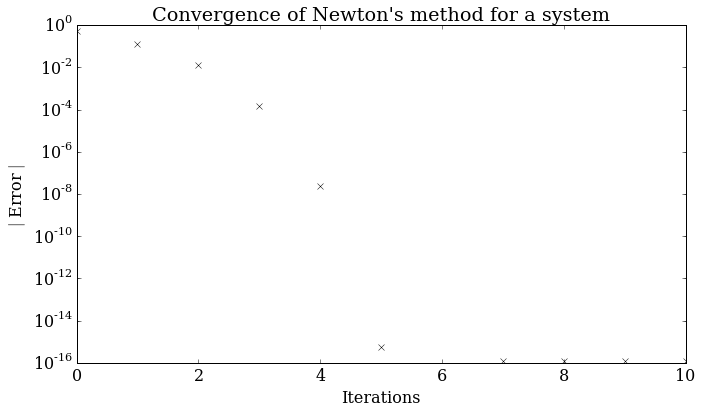

In [10]:
xi = np.array([np.sqrt(3.0)/2.0,0.5])
iters = range(len(result))
errors = np.linalg.norm(result-xi,2,axis=1)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(iters, errors, 'kx')
ax.set_xlabel("Iterations")
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_xbound(0.0,10.0)
ax.set_title("Convergence of Newton's method for a system")
fig.tight_layout()
plt.show()

## Summary

-   The theory of contraction mapping essentially carries over to
    systems by replacing scalars with vectors and absolute values with
    norms.

-   Analogies with solving systems of *linear* equations leads to
    “Gauss-Seidel” and “relaxation” methods.

-   Newton’s method generalizes by considering tangent *(hyper)planes*,
    which leads to a method based on the Jacobian matrix.